# Árvores de regressão - exercícios 01

*Atenção! Devido descontinuação da base de imóveis boston os alunos devem utilizar a base de dados que se encontra em anexo.*

A base que utilizaremos contem os dados dos imóveis da california.
Considerem como variável Target (a ser prevista) a coluna median_house_value.
O dataset é muito semelhante ao de boston, contendo localização, quartos, banheiros e outras variáveis interessantes para construção do modelo.

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import scipy

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split



### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [2]:
df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df_dummies = pd.get_dummies(df)
df_dummies

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,False,True,False,False,False
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,False,True,False,False,False
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,False,True,False,False,False
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,False,True,False,False,False


### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

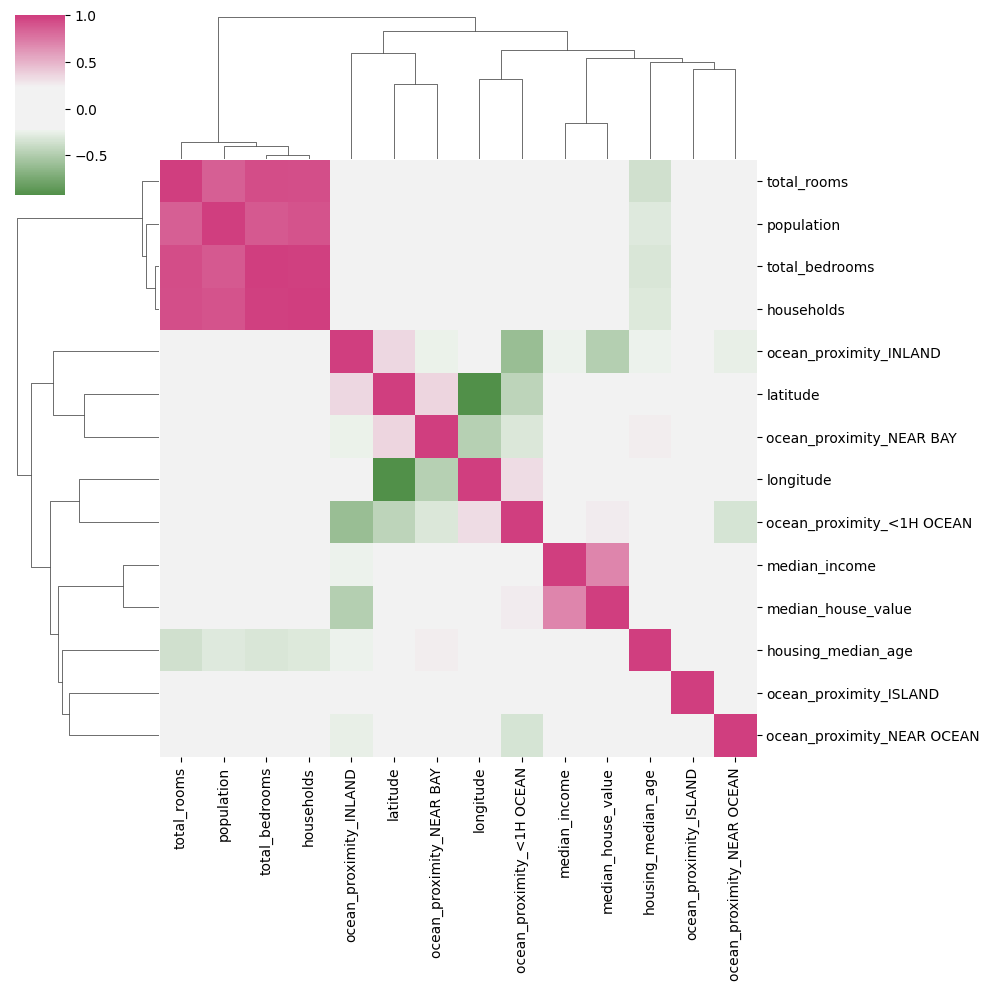

In [4]:
cmap= sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light')
sns.clustermap(df_dummies.corr() , figsize=(10,10), center = 0, cmap=cmap)

In [9]:
df_dummies.corr()["total_bedrooms"].sort_values(ascending=False)

total_bedrooms                1.000000
households                    0.979728
total_rooms                   0.930380
population                    0.877747
longitude                     0.069608
median_house_value            0.049686
ocean_proximity_<1H OCEAN     0.018314
ocean_proximity_NEAR OCEAN    0.000679
ocean_proximity_ISLAND       -0.004361
ocean_proximity_INLAND       -0.006463
median_income                -0.007723
ocean_proximity_NEAR BAY     -0.019873
latitude                     -0.066983
housing_median_age           -0.320451
Name: total_bedrooms, dtype: float64

In [10]:
df_dummies.corr()["total_rooms"].sort_values(ascending=False)

total_rooms                   1.000000
total_bedrooms                0.930380
households                    0.918484
population                    0.857126
median_income                 0.198050
median_house_value            0.134153
longitude                     0.044568
ocean_proximity_INLAND        0.025624
ocean_proximity_<1H OCEAN    -0.003031
ocean_proximity_ISLAND       -0.007572
ocean_proximity_NEAR OCEAN   -0.009175
ocean_proximity_NEAR BAY     -0.023022
latitude                     -0.036100
housing_median_age           -0.361262
Name: total_rooms, dtype: float64

In [11]:
df_dummies.corr()["population"].sort_values(ascending=False)

population                    1.000000
households                    0.907222
total_bedrooms                0.877747
total_rooms                   0.857126
longitude                     0.099773
ocean_proximity_<1H OCEAN     0.074613
median_income                 0.004834
ocean_proximity_ISLAND       -0.010412
ocean_proximity_INLAND       -0.020732
ocean_proximity_NEAR OCEAN   -0.024264
median_house_value           -0.024650
ocean_proximity_NEAR BAY     -0.060880
latitude                     -0.108785
housing_median_age           -0.296244
Name: population, dtype: float64

In [12]:
df_dummies.corr()["households"].sort_values(ascending=False)

households                    1.000000
total_bedrooms                0.979728
total_rooms                   0.918484
population                    0.907222
median_house_value            0.065843
longitude                     0.055310
ocean_proximity_<1H OCEAN     0.042435
median_income                 0.013033
ocean_proximity_NEAR OCEAN    0.001714
ocean_proximity_ISLAND       -0.009077
ocean_proximity_NEAR BAY     -0.010093
ocean_proximity_INLAND       -0.039402
latitude                     -0.071035
housing_median_age           -0.302916
Name: households, dtype: float64

households pois ele é o unico com 3 correlações acima de 0.9 o menor numero de correlações negativas com 5

### 3. Separe os dados em validação e teste

In [19]:
X = df_dummies.copy().drop(columns=['ocean_proximity_ISLAND','ocean_proximity_NEAR BAY','ocean_proximity_INLAND' ,'latitude','housing_median_age','households'])
X

,longitude,total_rooms,total_bedrooms,population,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_NEAR OCEAN
0,-122.23,880.0,129.0,322.0,8.3252,452600.0,False,False
1,-122.22,7099.0,1106.0,2401.0,8.3014,358500.0,False,False
2,-122.24,1467.0,190.0,496.0,7.2574,352100.0,False,False
3,-122.25,1274.0,235.0,558.0,5.6431,341300.0,False,False
4,-122.25,1627.0,280.0,565.0,3.8462,342200.0,False,False
...,...,...,...,...,...,...,...,...
20635,-121.09,1665.0,374.0,845.0,1.5603,78100.0,False,False
20636,-121.21,697.0,150.0,356.0,2.5568,77100.0,False,False
20637,-121.22,2254.0,485.0,1007.0,1.7000,92300.0,False,False
20638,-121.32,1860.0,409.0,741.0,1.8672,84700.0,False,False


In [20]:
y = df_dummies.copy()["households"]
y

0         126.0
1        1138.0
2         177.0
3         219.0
4         259.0
          ...  
20635     330.0
20636     114.0
20637     433.0
20638     349.0
20639     530.0
Name: households, Length: 20640, dtype: float64

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [22]:
arvore_8 = DecisionTreeRegressor( max_depth=8) 
arvore_2 = DecisionTreeRegressor( max_depth=2) 

In [23]:
arvore_8.fit(X_train,y_train)
arvore_2.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=2)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [24]:
score_2= arvore_2.score(X_train, y_train ) 
score_8= arvore_8.score(X_train, y_train ) 

In [25]:
print(score_2)
print(score_8)

0.8101681649812902
0.9881773065682801


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

Eu acho que a arvore 2 é mais adequada pois 98 é muita coisa, acho que isso pode ser over shiftting, desconsiderando o overshiftting a 8 parece melhor

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

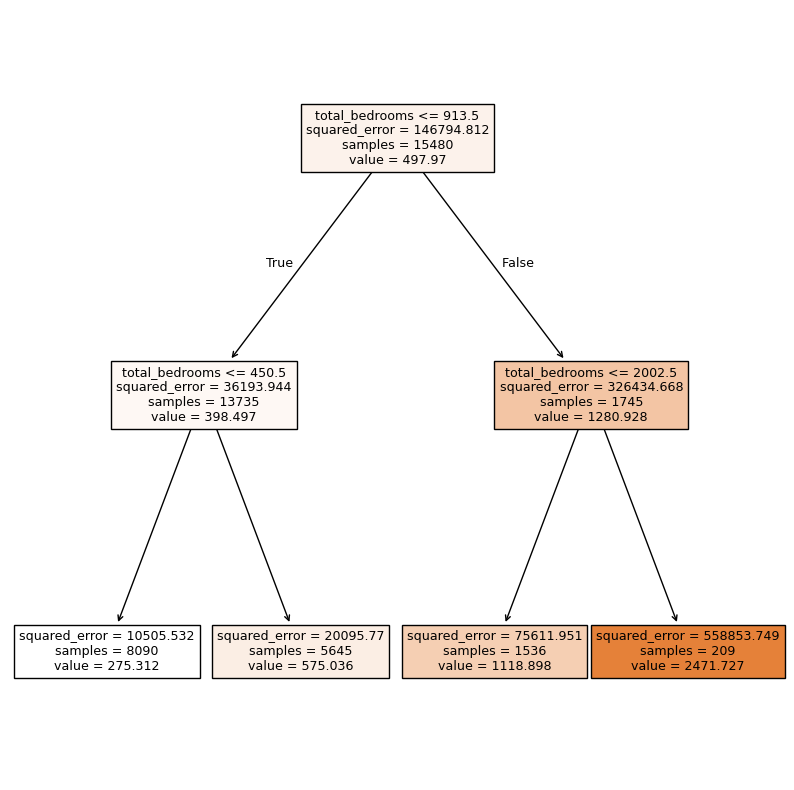

In [27]:
plt.rc('figure', figsize=(10,10))
tp = tree.plot_tree(arvore_2, feature_names = X.columns, filled=True)

total_bedroom parece ser o mais importante 